In [1]:
import numpy as np
from numpy.random import uniform
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.model_selection import KFold
import statsmodels.api as sm
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

C:\Python64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
X = uniform(0, 1, size=(80, 20))
Y = (np.sum(X[:,:10], axis=1)>5) + 0
X = np.hstack((np.ones(shape=(80,1)), X))

In [3]:
kf = KFold(n_splits=10)
p_errors = []
for p in range(21):
    errors = []
    stds = []
    for train_index, valid_index in kf.split(X):
        X_train, Y_train = X[train_index], Y[train_index]
        X_valid, Y_valid = X[valid_index], Y[valid_index]
        best_model, best_combination, best_beta, min_error = None, None, None, np.inf
        for predictors in combinations(list(range(1, 21)), p):
            predictors = [0] + list(predictors)
            X_ = X_train[:,predictors]
            beta = np.linalg.inv(X_.T @ X_) @ X_.T @ Y_train
            y_hat = np.round(X_ @ beta)
            error = np.mean(np.abs(Y_train - y_hat))
            if error < min_error:
                best_combination = predictors
                min_error = error
                best_beta = beta
        pred = np.round(X_valid[:,best_combination] @ best_beta)
        valid_error = np.mean(np.abs(Y_valid - pred))
        errors.append(valid_error)
        #print(best_combination, min_error, valid_error)
    print(p, np.mean(errors), np.std(errors, ddof=1)/np.sqrt(10))
    p_errors.append(errors)

0 0.425 0.049999999999999996
1 0.4625 0.0375
2 0.4125 0.0375
3 0.25 0.049300664859163464
4 0.2625 0.05086064839889043
5 0.2 0.027638539919628332
6 0.2875 0.049476425362657984
7 0.225 0.044876373392787536
8 0.1875 0.05017331074496789
9 0.2 0.04249182927993987
10 0.1875 0.05017331074496789
11 0.1625 0.03254270698294439
12 0.125 0.02635231383473649
13 0.175 0.04249182927993988
14 0.175 0.04249182927993988
15 0.1875 0.04658474953124562
16 0.1875 0.04269562819149833
17 0.175 0.04639803635691685
18 0.175 0.04249182927993988
19 0.175 0.027638539919628332
20 0.125 0.02635231383473649


(0, 0.6)

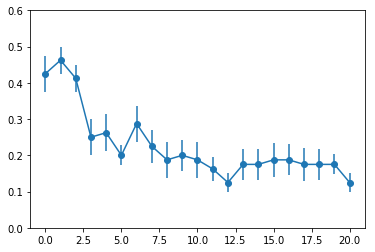

In [5]:
y = [np.mean(e) for e in p_errors]
e = [np.std(e, ddof=1)/np.sqrt(10) for e in p_errors]
x = list(range(21))
plt.errorbar(x, y, e, marker='o')
plt.ylim(0, 0.6)